<a href="https://colab.research.google.com/github/esatkaygisiz/Github-Example/blob/master/nlp_classification_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from string import punctuation



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Womens%20Clothing%20E-Commerce%20Reviews%20-%20Womens%20Clothing%20E-Commerce%20Reviews.csv')
data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


In [ ]:
data.rename(columns={"Review Text": "Text","Recommended IND": "Recommended", "Division Name": "Division_Name", "Department Name": "Department_Name", 
                     "Class Name": "Class_Name"}, inplace=True)

In [ ]:
data.head()

,Age,Title,Text,Recommended,Division_Name,Department_Name,Class_Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


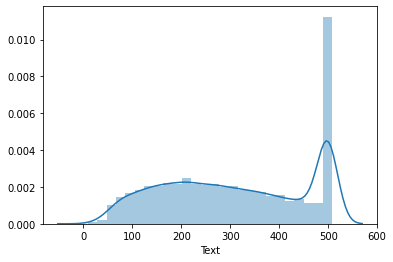

In [ ]:
length = data["Text"].str.len()
sns.distplot(length)
plt.show()

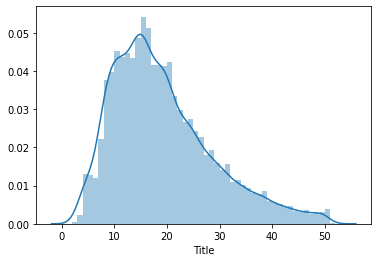

In [ ]:
length2 = data["Title"].str.len()
sns.distplot(length2)
plt.show()

In [ ]:
## Checking for stopwords
from nltk.corpus import stopwords
stopwordSet = set(stopwords.words("english"))

In [ ]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

In [ ]:
data.isna().sum()

Age                   0
Title              3810
Text                845
Recommended           0
Division_Name        14
Department_Name      14
Class_Name           14
dtype: int64

In [ ]:
data.Text.fillna(value='unknown', inplace=True)

In [ ]:
data.isna().sum()

Age                   0
Title              3810
Text                  0
Recommended           0
Division_Name        14
Department_Name      14
Class_Name           14
dtype: int64

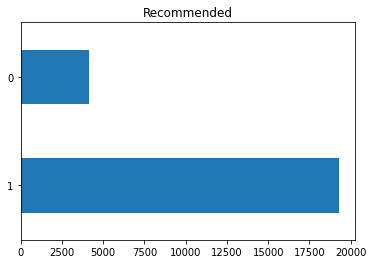

1    19314
0     4172
Name: Recommended, dtype: int64

In [ ]:
data.Recommended.value_counts().plot(kind='barh', title='Recommended')
plt.show() 
data.Recommended.value_counts()

In [ ]:
negative_labels = data[data.Recommended==0]
num_negative_labels = negative_labels.shape[0]
num_negative_labels

4172

In [ ]:
positive_labels = data[data.Recommended==1].sample(num_negative_labels)
positive_labels

,Age,Title,Text,Recommended,Division_Name,Department_Name,Class_Name
19991,53,"Comfy, elegant, slimming",I got compliments the moment i walked into the...,1,General,Bottoms,Jeans
4750,35,Awesome dress!,One of the best maxi dresses i have ever found...,1,General,Dresses,Dresses
4544,35,Pretty fabric,"Such pretty pattern and colors, pleased with d...",1,General Petite,Dresses,Dresses
12271,51,Comfy & cool,What a great purchase (especially on sale!) as...,1,Initmates,Intimate,Lounge
3711,22,Sweetest sweatshirt,It's the perfect sweatshirt! super comfortable...,1,General,Tops,Knits
...,...,...,...,...,...,...,...
15222,66,??so cute,Lately retailer tees have been misses for me b...,1,General Petite,Tops,Knits
16308,36,Beautiful and flattering,"I love the details of this top, from the pleat...",1,General,Tops,Blouses
23054,50,Flattering and comfy!,This top is my favorite of the season! plannin...,1,General,Tops,Knits
625,28,My new favorite swim suit,The colors and fit of this suit are even bette...,1,Initmates,Intimate,Swim


In [ ]:
balanced_data =  negative_labels.append(positive_labels)

In [ ]:
balanced_data

,Age,Title,Text,Recommended,Division_Name,Department_Name,Class_Name
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",0,General,Dresses,Dresses
10,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,0,General,Dresses,Dresses
22,31,Not what it looks like,"First of all, this is not pullover styling. th...",0,General,Dresses,Dresses
25,31,Falls flat,"Loved the material, but i didnt really look at...",0,Initmates,Intimate,Lounge
...,...,...,...,...,...,...,...
19679,34,Beautiful,This dress is stunning! the quality is impecca...,1,General,Dresses,Dresses
8155,41,Too sheer for me,I really liked this top. i wish it was not so ...,1,General Petite,Tops,Blouses
14252,51,Exceeded expectations,Received this top as a gift from a friend with...,1,General,Tops,Blouses
12477,66,Beautiful dress,"Ordered size 12, it fits but pulls a tiny bit ...",1,General Petite,Dresses,Dresses


In [ ]:
## Clean the text after balancing
reviews = list()
for sentence in balanced_data.Text:
    text = re.sub('[^a-zA-Z]'," ", sentence)
    text = text.lower()
    text = word_tokenize(text, language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    reviews.append(text)

In [ ]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(reviews).toarray()

In [ ]:
pd.DataFrame(X, columns=cv.get_feature_names()).head()

,able,absolutely,accent,accentuates,according,accurate,accurately,across,acrylic,actual,actually,add,added,adding,addition,additional,additionally,adjust,adjustable,adorable,adore,aesthetic,afraid,ag,age,ago,agree,air,airy,ala,allows,almost,alone,along,already,also,altered,alternative,although,always,...,wonder,wonderful,wonderfully,wondering,wool,word,wore,work,worked,working,worn,worried,worry,worse,worst,worth,would,woven,wow,wrap,wrinkle,wrinkled,wrist,write,wrong,xl,xsp,xx,xxsp,yarn,year,yellow,yes,yesterday,yet,yoga,zero,zip,zipped,zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y= balanced_data['Recommended']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state = 0)

In [ ]:
## Logistic Regression 
logreg = LogisticRegression(max_iter=10000) 
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.8368017524644029
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       671
           1       0.82      0.86      0.84       664

    accuracy                           0.84      1335
   macro avg       0.84      0.84      0.84      1335
weighted avg       0.84      0.84      0.84      1335

[[549 122]
 [ 96 568]]


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))

AUC:  0.8373819420753057
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       671
           1       0.85      0.82      0.83       664

    accuracy                           0.84      1335
   macro avg       0.84      0.84      0.84      1335
weighted avg       0.84      0.84      0.84      1335



In [ ]:
print(confusion_matrix(y_valid, Y_pred))

[[571 100]
 [117 547]]


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred = xgb_model.predict(X_valid)

print(confusion_matrix(y_valid, Y_pred))

[[518 153]
 [120 544]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       671
           1       0.78      0.82      0.80       664

    accuracy                           0.80      1335
   macro avg       0.80      0.80      0.80      1335
weighted avg       0.80      0.80      0.80      1335

